In [76]:
# Annie Smith
# Project 2 -- CMSC320 -- A study on efficiency of baseball
# teams spending money, especially in relation to Oakland and
# and the movie Moneyball. 

import sqlite3
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# PART 1
# PROBLEM 1
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
 
salary_query = "SELECT teamID, yearID, sum(salary)\
                as total_payroll FROM Salaries GROUP\
                BY teamID, yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries

,teamID,yearID,total_payroll
0,ATL,1985,14807000.0
1,BAL,1985,11560712.0
2,BOS,1985,10897560.0
3,CAL,1985,14427894.0
4,CHA,1985,9846178.0
...,...,...,...
855,SLN,2014,120693000.0
856,TBA,2014,72689100.0
857,TEX,2014,112255059.0
858,TOR,2014,109920100.0


In [77]:
team_query = "SELECT teamID, yearID, franchID, G, W, L, LgWin, WSWin, W*100.0/G  as perWin FROM Teams"
teams_games = pandas.read_sql(team_query, conn)
# Do a join to merge the teams and salaries
merge_teams = team_salaries.merge(teams_games,\
                    how= 'inner', on = ['yearID','teamID'])
print(merge_teams)
# An inner join was to done in order to get rid 
# of any rows that had a missing yearID or teamID

    teamID  yearID  total_payroll franchID    G   W   L LgWin WSWin     perWin
0      ATL    1985     14807000.0      ATL  162  66  96     N     N  40.740741
1      BAL    1985     11560712.0      BAL  161  83  78     N     N  51.552795
2      BOS    1985     10897560.0      BOS  163  81  81     N     N  49.693252
3      CAL    1985     14427894.0      ANA  162  90  72     N     N  55.555556
4      CHA    1985      9846178.0      CHW  163  85  77     N     N  52.147239
..     ...     ...            ...      ...  ...  ..  ..   ...   ...        ...
853    SLN    2014    120693000.0      STL  162  90  72     N     N  55.555556
854    TBA    2014     72689100.0      TBD  162  77  85     N     N  47.530864
855    TEX    2014    112255059.0      TEX  162  67  95     N     N  41.358025
856    TOR    2014    109920100.0      TOR  162  83  79     N     N  51.234568
857    WAS    2014    131983680.0      WSN  162  96  66     N     N  59.259259

[858 rows x 10 columns]


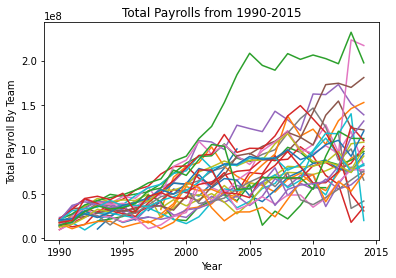

In [78]:
# PART 2
# PROBLEM 2
merge_teams  = merge_teams[merge_teams['yearID'] >= 1990]
fig, ax = plt.subplots()
teams = numpy.unique(merge_teams['teamID'])
# Creates the line for each of the teams over the entire 1990-2015 period
for t in teams:   
    team =  merge_teams[merge_teams['teamID'] == t]
    ax.plot(team['yearID'], team['total_payroll'], label = t)

# Creates labels for the graphs
plt.title("Total Payrolls from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Total Payroll By Team")
plt.show()

In [79]:
## QUESTION 1
# The data seems to be centralized with little variation besides
# a few outliers lile the NYA who have a greatly increasing 
# total payroll a few outliers, and they generally increase 
# over time

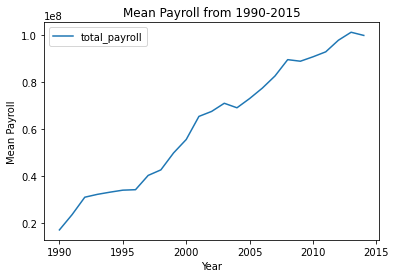

In [80]:
# PROBLEM 3
mean = merge_teams[['yearID' , 'total_payroll']]
# Takes the mean payroll of each year
mean_payroll = (mean.groupby('yearID')).mean()
mean_payroll

# Creates labels for the graphs
ax = mean_payroll.plot()
ax.set_title("Mean Payroll from 1990-2015")
ax.set_xlabel("Year")
ax.set_ylabel("Mean Payroll")
plt.show()

In [81]:
# PROBLEM 4
period = [1,2,3,4,5]
per = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2015']
# Creates a new column that breaks the year into 5 periods
merge_teams['cat'] = pandas.cut(merge_teams.yearID,5,  labels = period)

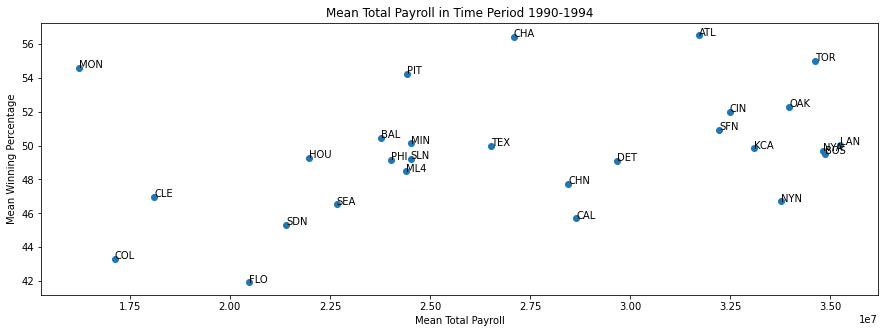

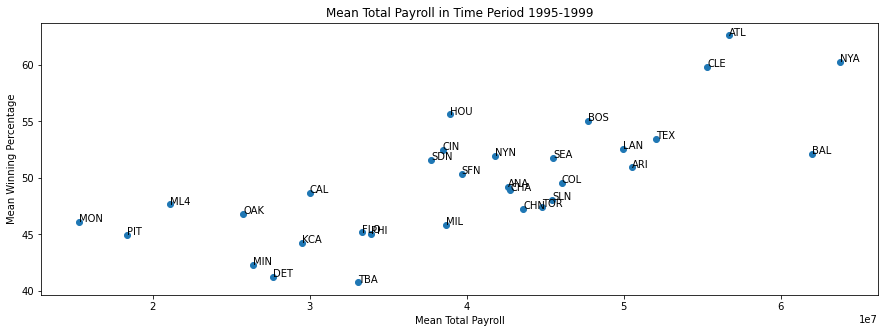

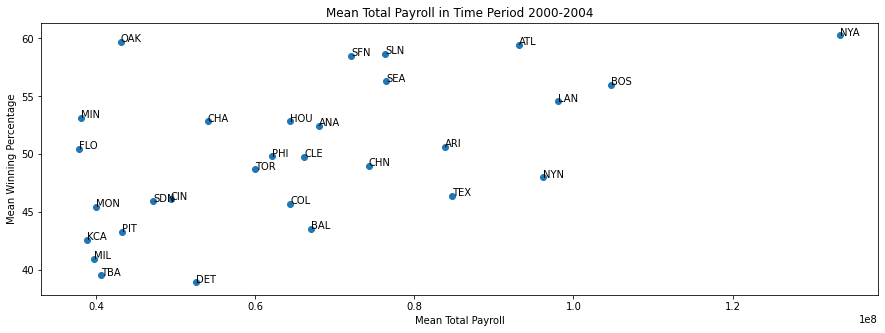

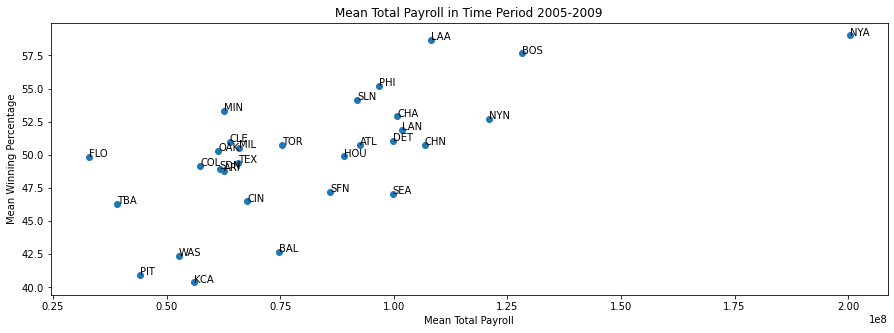

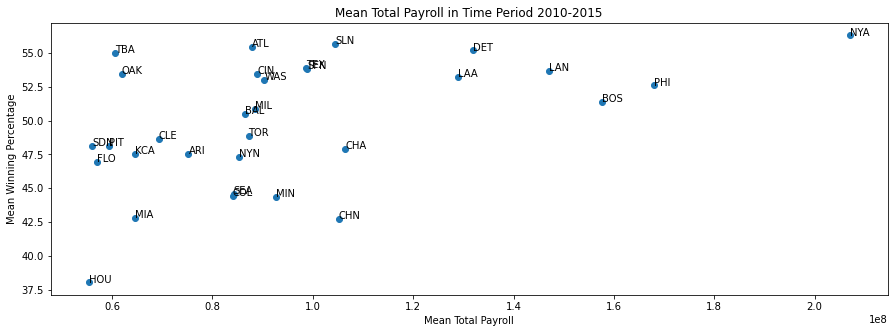

In [82]:
# Creates a plot for each period
for p in period:
    x_val = []
    y_val = []
    teams_period = merge_teams[merge_teams['cat'] == p]
    # Makes a point for each team
    for t in teams:   
        team =  teams_period[teams_period['teamID'] == t]
        x_val.append(team['total_payroll'].mean())
        y_val.append(team['perWin'].mean())
    plt.figure(figsize=(15,5))
    plt.plot(x_val,y_val, 'o')
    # Labels all points
    for i, txt in enumerate(teams):
        plt.annotate(txt, (x_val[i], y_val[i]), size = 10)
        
    # Creates labels for the graphs
    plt.xlabel("Mean Total Payroll")
    plt.ylabel("Mean Winning Percentage")
    plt.title("Mean Total Payroll in Time Period " + per[p-1])
    plt.show()    
    

In [83]:
## QUESTION 2
# The total payroll tends to stay within the 40-60 range. 
# Additionally, the lines seem to be linear increasing with
# % win and payroll, besides a few outliers. In some periods,
# Oakland stands out as getting a high win percenttage for
# a low payroll, and therefore having a high efficiency.
# Additionally, NYA stands out because they alwayshave an
# extremely high payroll, but usually hae a high winning
# percentage as well.

In [84]:
# PART 3
# PROBLEM 5 

# Makes series for each year
avg_payroll = (merge_teams.groupby(['yearID']))['total_payroll'].mean()
std_payroll = (merge_teams.groupby(['yearID']))['total_payroll'].std()
std_pay = []

# Adds the standardized payroll to each row in the dataframe
for i1, row1 in merge_teams.iterrows():
    num = row1['total_payroll']-avg_payroll[row1['yearID']]
    denom = std_payroll[row1['yearID']]
    std_pay.append(num/denom)
            
merge_teams['std_payroll'] = std_pay
merge_teams

,teamID,yearID,total_payroll,franchID,G,W,L,LgWin,WSWin,perWin,cat,std_payroll
130,ATL,1990,14555501.0,ATL,162,65,97,N,N,40.123457,1,-0.667275
131,BAL,1990,9680084.0,BAL,161,76,85,N,N,47.204969,1,-1.959861
132,BOS,1990,20558333.0,BOS,162,88,74,N,N,54.320988,1,0.924213
133,CAL,1990,21720000.0,ANA,162,80,82,N,N,49.382716,1,1.232198
134,CHA,1990,9491500.0,CHW,162,94,68,N,N,58.024691,1,-2.009859
...,...,...,...,...,...,...,...,...,...,...,...,...
853,SLN,2014,120693000.0,STL,162,90,72,N,N,55.555556,5,0.457126
854,TBA,2014,72689100.0,TBD,162,77,85,N,N,47.530864,5,-0.593171
855,TEX,2014,112255059.0,TEX,162,67,95,N,N,41.358025,5,0.272509
856,TOR,2014,109920100.0,TOR,162,83,79,N,N,51.234568,5,0.221422


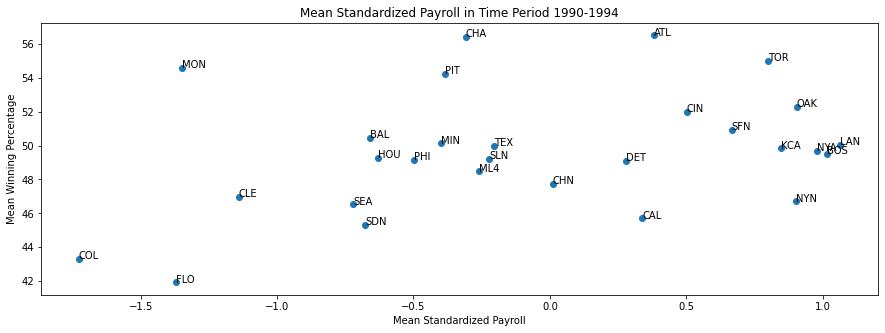

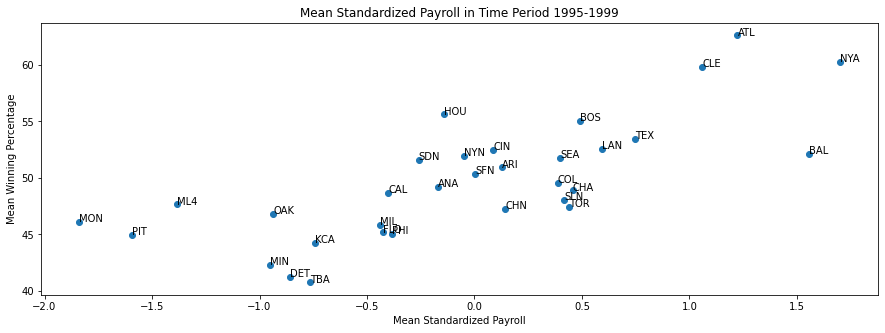

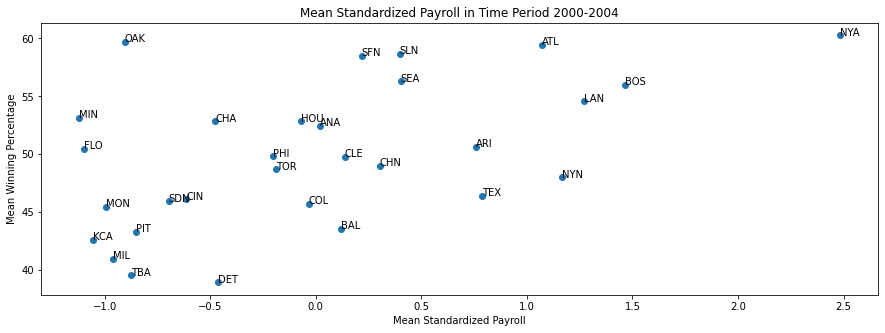

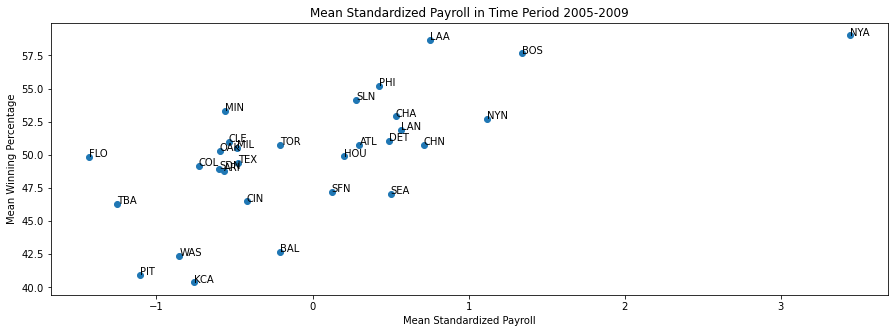

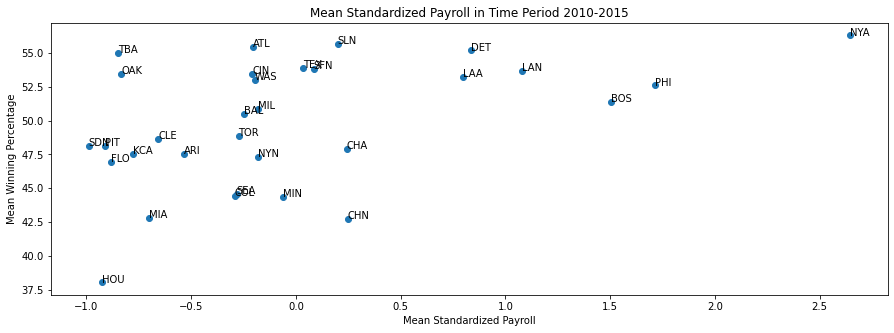

In [85]:
# PROBLEM 6 
# Creates a plot for each period
for p in period:
    x_val = []
    y_val = []
    teams_period = merge_teams[merge_teams['cat'] == p]
    # Makes a point for each team
    for t in teams:   
        team =  teams_period[teams_period['teamID'] == t]
        # Uses the standardized values
        x_val.append(team['std_payroll'].mean())
        y_val.append(team['perWin'].mean())
    plt.figure(figsize=(15,5))
    plt.plot(x_val,y_val, 'o')
    # Creates labels for each point
    for i, txt in enumerate(teams):
        plt.annotate(txt, (x_val[i], y_val[i]), size = 10)
    
    # Creates labels for each graph
    plt.xlabel("Mean Standardized Payroll")
    plt.ylabel("Mean Winning Percentage")
    plt.title("Mean Standardized Payroll in Time Period " + per[p-1])
    plt.show()     
    

In [86]:
## QUESTION 3
# The winning percentages have stayed the same but the x-axis
# changed to become standardized on the payroll axis. This
# has allowed the graphs between periods to become more similar
# along the x-axis and be more comparable to each other across
# periods. However, the main shapes of the graphs and relations
# between points have stayed the same.

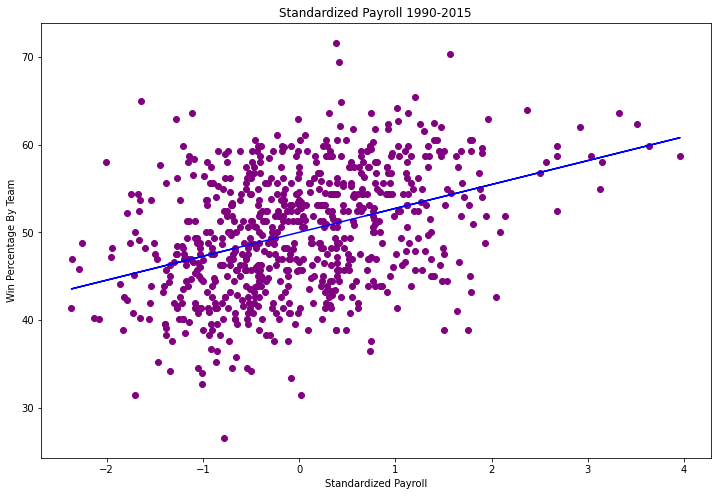

In [87]:
# PROBLEM 7 
from sklearn.linear_model import LinearRegression

x = (merge_teams['std_payroll'].values).reshape(-1,1) # makes these a numpy array
y = (merge_teams['perWin'].values).reshape(-1,1)
linear_regressor = LinearRegression() 
linear_regressor.fit(x, y)
Y_pred = linear_regressor.predict(x) 

#Creates labels for the graphs
plt.figure(figsize=(12,8))
plt.scatter(x, y, color ='purple')
plt.plot(x, Y_pred, color='blue')
plt.title("Standardized Payroll 1990-2015")
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage By Team")
plt.show()

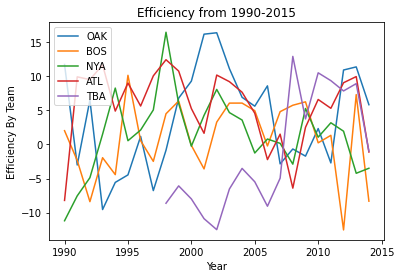

In [88]:
# PROBLEM 8
merge_teams['exp_perWin'] = 50 + 2.5 * merge_teams['std_payroll']
merge_teams['efficiency'] = merge_teams['perWin'] - merge_teams['exp_perWin']
fig, ax = plt.subplots()
teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
# Makes a plot for the teams specified above
for t in teams:   
    team =  merge_teams[merge_teams['teamID'] == t]
    ax.plot(team['yearID'], team['efficiency'], label = t)

# Creates labels for the graphs
plt.legend(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])
plt.title("Efficiency from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Efficiency By Team")
plt.show()


In [ ]:
## QUESTION 4 
# This plot is not broken up into periods and therefore can
# show tht Oakland is not as efficient as it looks in some
# periods. However, it does solidify how in the early 2000s
# (the moneyball period) Oakland was so much more efficent
# than any other teams. 